https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [223]:
# here we make a 'year' column extracted out of the 'date' column

def function(x):
    return x[:4]

data['year_sold'] = data['date'].apply(function)


# likewise extracting the months

def function(x):
    return x[4:6]

data['month_sold'] = data['date'].apply(function)

data['month_sold'] = data['month_sold'].astype(int)

# remove the source column

data.drop('date',axis=1, inplace=True)

In [224]:
# our new columns being on the end
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month_sold'>

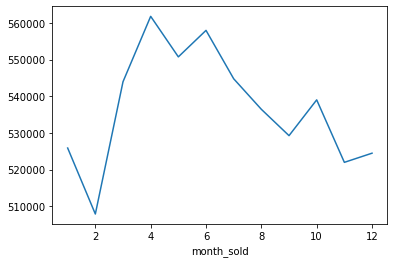

In [225]:
# Here we plot the mean price in each month and it shows there is significant variation through the year
data.groupby('month_sold').mean()['price'].plot()

In [226]:
data.groupby('month_sold').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
month_sold,,,,,,,,,,,,,,,,,,,,
1,4.574031e+09,525870.889571,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,98077.897751,47.553500,-122.212188,1975.859918,12687.026585
2,4.600261e+09,507851.371200,3.340000,2.059600,2010.974400,13703.131200,1.467600,0.004800,0.243200,3.404800,7.554400,1726.692800,284.281600,1971.464000,51.055200,98076.708000,47.546741,-122.215691,1942.907200,11606.648800
3,4.600587e+09,543977.187200,3.367467,2.065333,2021.968533,15604.088533,1.464267,0.006933,0.238933,3.355733,7.588267,1740.604800,281.363733,1970.597333,82.976533,98077.578667,47.553377,-122.214041,1951.490133,12678.426133
4,4.693827e+09,561837.774989,3.364859,2.106006,2060.377409,14265.989691,1.495069,0.008516,0.230390,3.359032,7.651277,1777.770955,282.606455,1971.713133,70.670551,98078.910802,47.560420,-122.213480,1986.544599,12650.147468
5,4.608945e+09,550768.785833,3.363712,2.116508,2090.514913,16678.293289,1.486123,0.005385,0.239022,3.420464,7.674399,1780.695940,309.818973,1970.216653,105.121375,98079.094863,47.565075,-122.214854,1990.449876,13694.719553
6,4.573257e+09,558002.199541,3.418349,2.163876,2132.820642,14260.094954,1.513303,0.008716,0.241743,3.460092,7.738532,1822.365138,310.455505,1970.741284,80.543119,98079.594495,47.565591,-122.214406,2035.218807,12842.035780
7,4.578350e+09,544788.764360,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,98074.758933,47.560198,-122.206664,2029.130710,12584.116689
8,4.616929e+09,536445.276804,3.355670,2.123067,2084.762887,14636.380928,1.500258,0.006186,0.223196,3.440206,7.685567,1798.204639,286.558247,1972.058247,78.193814,98077.058247,47.564831,-122.209811,1995.676289,12960.812887
9,4.458143e+09,529253.821871,3.360203,2.130919,2077.375986,15367.856257,1.490981,0.008455,0.248591,3.430665,7.640361,1785.519166,291.856821,1970.535513,99.047914,98078.445885,47.560565,-122.212648,1982.601466,11894.253100


In [227]:
# So for the model, we see the peak is in june so can express the months in their distance from May
def function(x):
    if x == 6:
        return 0
    elif x == 5 or x == 7:
        return 1
    elif x == 4 or x == 8:
        return 2
    elif x == 3 or x == 9:
        return 3 
    elif x == 2 or x == 10:
        return 4
    elif x == 1 or x == 11:
        return 5
    elif x == 12:
        return 6
    
data['dist_june'] = data['month_sold'].apply(function)

data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,dist_june
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,4
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,6
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,4
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,6
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,4


In [228]:
data.groupby('dist_june').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold
dist_june,,,,,,,,,,,,,,,,,,,,,
0,4.573257e+09,558002.199541,3.418349,2.163876,2132.820642,14260.094954,1.513303,0.008716,0.241743,3.460092,...,1822.365138,310.455505,1970.741284,80.543119,98079.594495,47.565591,-122.214406,2035.218807,12842.035780,6.000000
1,4.594319e+09,547910.012324,3.377081,2.130865,2108.552649,15329.875676,1.503351,0.006054,0.230486,3.431135,...,1809.778811,298.773838,1970.962595,98.908541,98077.022054,47.562743,-122.210939,2008.941405,13163.791351,5.956108
2,4.658061e+09,550027.310717,3.360585,2.113942,2071.719492,14438.264685,1.497483,0.007432,0.227044,3.396787,...,1787.274994,284.444498,1971.873651,74.169743,98078.049149,47.562472,-122.211773,1990.791896,12794.643011,5.860465
3,4.531336e+09,536819.267196,3.363935,2.097218,2048.905454,15489.241710,1.477254,0.007673,0.243628,3.392162,...,1762.440395,286.465059,1970.567279,90.789805,98078.000274,47.556872,-122.213364,1966.615237,12297.192107,5.916964
4,4.555138e+09,526568.691496,3.352302,2.095189,2054.755435,14775.770460,1.488811,0.007033,0.243926,3.408568,...,1763.079923,291.675512,1970.656969,77.122762,98077.852621,47.555994,-122.216737,1966.114130,12436.923593,6.803069
5,4.544216e+09,523561.621599,3.355797,2.099833,2063.639598,16327.682712,1.491628,0.009627,0.231478,3.379657,...,1791.514860,272.124738,1970.769778,81.785266,98078.277103,47.556029,-122.215708,1955.079950,12845.201339,6.906237
6,4.559764e+09,524461.866757,3.390891,2.102991,2091.339225,15330.740313,1.487084,0.008158,0.216859,3.394969,...,1787.078858,304.260367,1971.276003,77.410605,98077.550646,47.559581,-122.220801,1976.046907,13091.547247,12.000000


<AxesSubplot:xlabel='dist_june'>

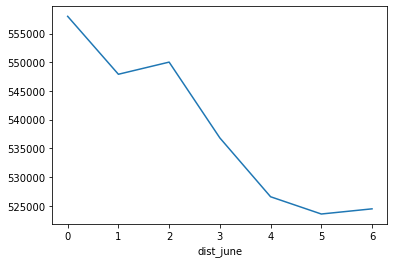

In [230]:
# This way we are able to express the circular months in a linear form:
data.groupby('dist_june').mean()['price'].plot()

In [233]:
# id and zip code are arbitrary figures and so they are omitted

data.drop(['id','zipcode'],axis=1, inplace=True)

In [234]:
import statsmodels.api as sm

X = data.drop(['price'],axis=1)
X = X.astype(float)
y = data['price']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2620.
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:28:27   Log-Likelihood:            -2.9468e+05
No. Observations:               21613   AIC:                         5.894e+05
Df Residuals:                   21593   BIC:                         5.896e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.623e+08   1.26e+07    -12.887